# Изучение рынка компьютерных игр

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Изучение и обработка данных

### Описание данных

-	Name — название игры
-	Platform — платформа
-	Year_of_Release — год выпуска
-	Genre — жанр игры
-	NA_sales — продажи в Северной Америке (миллионы проданных копий)
-	EU_sales — продажи в Европе (миллионы проданных копий)
-	JP_sales — продажи в Японии (миллионы проданных копий)
-	Other_sales — продажи в других странах (миллионы проданных копий)
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию  

Данные за 2016 год могут быть неполными.


### Загрузка и осмотр датасета

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from pymystem3 import Mystem
from collections import Counter
from scipy import stats as st

In [2]:
#Сформируем датасет
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.sample(random_state = None, n = 5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8500,Splatterhouse,PS3,NaN,Action,0.13,0.02,0.00,0.02,59.0,7.7,M
1095,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,0.83,0.66,0.00,0.18,86.0,7.9,T
3504,Cabela's Dangerous Hunts 2011,Wii,2010.0,Sports,0.52,0.02,0.00,0.04,NaN,tbd,T
809,Mario Sports Mix,Wii,2010.0,Sports,0.88,0.44,0.63,0.12,64.0,7.1,E
8280,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.00,0.02,NaN,tbd,E


In [6]:
#Чтобы часть столбцов в дальнейшем не скрывалась, настроим принудительное отображение
pd.set_option('display.max_columns', None)

In [7]:
df['Rating'].unique().tolist()

['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']

In [8]:
df['Genre'].unique().tolist()

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy',
 nan]

### Выводы 

Необходимо:
- обработать пропуски в колонках: Year_of_Release, Critic_Score, User_Score, Rating, Genre
- изменить типа данных в User_Score 
- изменить регист заголовков столбцов

## Предобработка данных


### Замена названия столбцов

In [9]:
#приведем к нижнему регистру
df.columns = map(str.lower, df.columns)

In [10]:
#проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Приведение данных к нужным типам

В 'user_score' есть значения с аббревиатурой 'tbd', которые не позволяют изменить тип данных.  
Посмотрим, что это и как исправить.

In [11]:
#выведем строки с "tbd"
df.query('user_score =="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Порядка 15% строк с такой аббревиатурой. Переводится, как "подлежит уточнению".  
Явных закономерностей не прослеживается, использовать число (заменить tbd на 0) мы не можем, иначе замененные tbd могут повлиять на оценку рейтингов. Поэтому присвоим значение NaN

In [12]:
#Заменим "tbd" на Nan
df.loc[df['user_score']=="tbd", 'user_score']=np.nan
#Заменим тип данных пользовательского рейтинга с текстового на числовой с плавающей точкой
df['user_score'] = df['user_score'].astype('float64')

In [13]:
#Заменим тип данных на целочисленный
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [14]:
#проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработка пропусков данных

In [15]:
#Посмотрим, сколько у нас пропусков в данных
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Посмотрим поближе на строки с пропусками

In [16]:
#Пропуски в названиях игр
df.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2 строки с отсутствием данных в большинстве колонок.  
Возможно в 1993 году еще не составляли рейтинги на постоянной основе и не вссе игры их имели.  
Удалим эти строки.

In [17]:
#Пропуски в дате выхода игр
df.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Кажется, что можно частично заменить пропуски на год, указанный в названии игры.  
Но как показывает практика, года в названиях и по факту выпуска могут не соответствовать, так как часть игр выходит заранее (спортивные игры в частности).  
Поэтому мы не можем ни чем заменить пропуски.

In [18]:
#Пропуски в жанре игр
df.query('genre.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это те же строки, что и пропуски в названиях. Удаляем

In [19]:
df.dropna(subset = ['name'], inplace = True)

In [20]:
#Пропуски в колонке "оценка критиков"
df.query('critic_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
#Пропуски в колонке "оценка пользователей"
df.query('user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [22]:
#Пропуски в рейтинге от организации ESRB 
df.query('rating.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Как видим, пропуски в оценках и рейтингах не зависят от платформы, есть и в старые в современных играх. Даже одна и та же игра на разных платформах может иметь разные рейтинги.
Я не вижу эффективного способа заполнения пропусков, чтобы не исказить данные.  
Поэтому оставляем как есть, и будем использовать для анализа то, что имеем.

In [23]:
#Проверим дубликаты
df.duplicated().sum()

0

Причинами появления таких пропусков могут быть и ошибки выгрузки данных и человеческих фактор и что-то другое.

### Расчёты и добавление результатов в таблицу¶

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [24]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Данные скорректированы, добавлен новый столбец с общими продажами, можно приступать к анализу

## Исследовательский нализ данных


### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [25]:
#Создадим таблицу учёта количества игр разных лет выпуска
year_of_release = df.groupby('year_of_release')['name'].count().reset_index()
year_of_release.columns = ['year', 'sum']
year_of_release

,year,sum
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


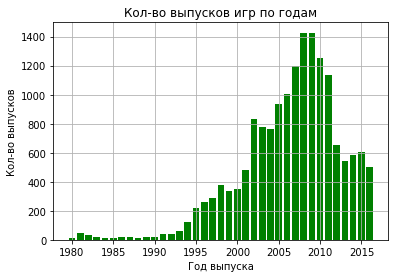

In [26]:
plt.bar(year_of_release['year'], year_of_release['sum'], label='Кол-во выпусков в год', color='g')
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во выпусков')
plt.grid()
plt.title(f'Кол-во выпусков игр по годам')
plt.show();

История игр на одном графике. Простейшие игры до середины 90х. Техника/технологии, вероятно, еще не позволяли развиваться рынку игр. Затем в 94-95 годах наблюдается резкий скачок, компьютеры и приставки входят в жизнь обычных граждан и рынок игр стремительно набирает обороты. В 2002 количество игр снова увеличивается, практически вдвое и продолжает рост вплоть до 2011 года. В 2012 мы видим падение в половину предыдущего года и далее уже никакого роста не наблюдается. Вероятно это можно объяснить популярностью мобильных игр, люди "ушли" в телефоны. Нет спроса на компютерные игры, значит и не имеет смысла выпускать новые. Куда логичнее инвестировать в мобильные игры. Вероятно, производители игр так и поступили.
Данные до 1995 года не обладают актуальностью.

### Анализ продаж по платформам.

Посмотрим, как менялись продажи по платформам.  
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.  
Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы

In [27]:
df.groupby('platform')['total_sales'].sum().sort_values().reset_index()

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [28]:
#Создадим Топ10 платформ по продажам
platform_df = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
platform_df

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


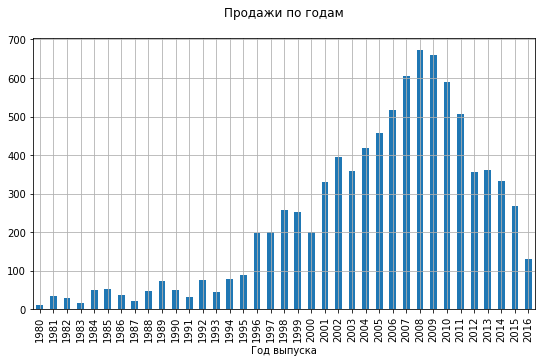

In [29]:
df.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', kind='bar', figsize=(9,5))
plt.title('Продажи по годам\n  ')
plt.xlabel('Год выпуска')
plt.grid(True)
plt.show();

In [30]:
#Создадим переменную, хранящую список Топ10 продаж платформ
top_platforms = platform_df['platform'].to_list()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [31]:
#Создадим новый датасет, отфильтровав старый по названиям платформ, хранящимся в переменной
df_new_top = df.query('platform in @top_platforms')
df_new_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


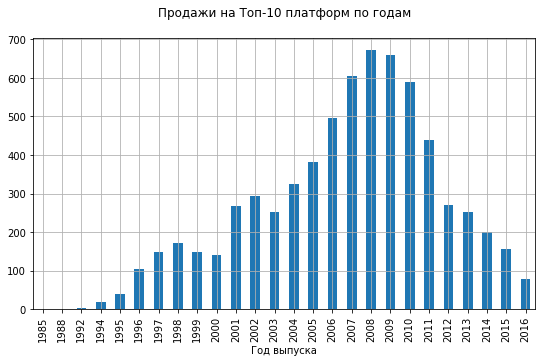

In [32]:
df_new_top.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', kind='bar', figsize=(9,5))
plt.title('Продажи на Топ-10 платформ по годам\n  ')
plt.xlabel('Год выпуска')
plt.grid(True)
plt.show();

Топ10 платформ по практически продажам не включает данные до 1995, что подтверждает неактуальность этого периода.

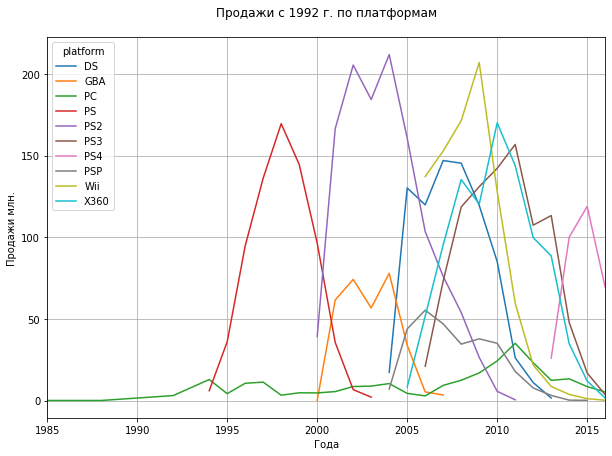

In [33]:
#Теперь построим распределение по годам для каждой из Топ10 платформ
#
pd.pivot_table(df_new_top , index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,7))
plt.grid(True)
plt.title('Продажи с 1992 г. по платформам\n  ')
plt.xlabel('Года')
plt.ylabel('Продажи млн.')
plt.show()


Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы

In [34]:
#Сколько лет "живет" Топ10 платформ
df_new_top_years = df_new_top.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
df_new_top_years['platform'].value_counts()

PC      26
PS2     12
X360    12
PSP     12
Wii     11
DS      11
PS3     11
PS      10
GBA      8
PS4      4
Name: platform, dtype: int64

**Вывод:** Продолжительность жизни платформы в среднем 11 лет.

### Определение актуального периода.

Для дальнейших исследований возьмём данные только за соответствующий актуальный период. 
Актуальный период определим в результате исследования предыдущих вопросов. 
Основной фактор — эти данные помогут построить прогноз на 2017 год.


Как мы выяснили ранее, средний срок жизни платформ прримерно 11 лет, поэтому для прогноза на 2017 год возьмем предыдущий период в 11 лет (с 2006 года)

In [35]:
#Сводная таблица количества игр для каждой платформы по годам в актуальный период
df.query('year_of_release > 2005').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='.')

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
3DS,.,.,.,.,.,116,93,91,80,86,46
DC,.,1,1,.,.,.,.,.,.,.,.
DS,201,376,492,403,323,153,23,8,.,.,.
GBA,39,6,.,.,.,.,.,.,.,.,.
GC,40,4,.,.,.,.,.,.,.,.,.
PC,52,62,76,107,90,139,61,38,47,50,54
PS2,259,214,191,96,38,7,.,.,.,.,.
PS3,27,90,138,162,181,215,148,126,108,73,38
PS4,.,.,.,.,.,.,.,16,75,137,164


По распределению можно заметить, что примерно в 2006 году рынок платформ меняется и на замену старым приходят новые.  
Поэтому можно сократить актуальный период до 6 лет (2011 - 2016).  
Да мы потеряем данные по платформам, которые были на всем периоде 11 лет, но рынок игр так стремительно меняется, что корректнее брать в расчёт более поздний период, в котором будут пробладать новые платформы.

### Поиск потенциально прибыльных платформ

Выясним, какие платформы лидируют по продажам, растут или падают.  
Выберем несколько потенциально прибыльных платформ.

In [36]:
df_actual_years = df[df['year_of_release'] >= 2011]
df_actual_years.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='.')

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,116,93,91,80,86,46
DS,153,23,8,.,.,.
PC,139,61,38,47,50,54
PS2,7,.,.,.,.,.
PS3,215,148,126,108,73,38
PS4,.,.,16,75,137,164
PSP,139,106,54,10,3,.
PSV,18,53,63,100,110,85
Wii,143,31,12,6,4,1


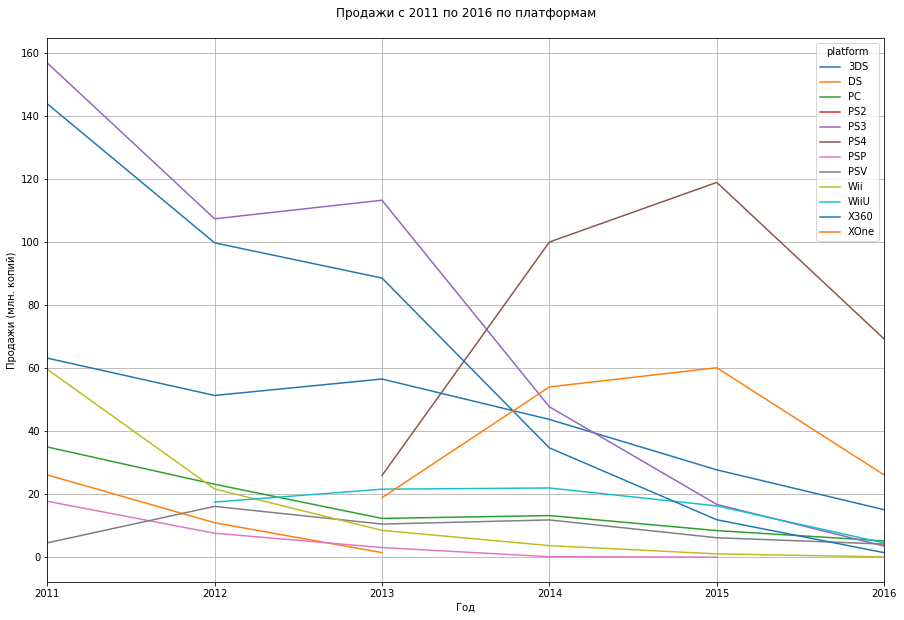

In [37]:
#Построим графики динамики продаж Топ10 платформ за актуальный период
#
pd.pivot_table(df_actual_years, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,10))
plt.grid(True)
plt.title('Продажи с 2011 по 2016 по платформам\n  ')
plt.xlabel('Год')
plt.ylabel('Продажи (млн. копий)')
plt.show()

Как мы видим на графике, все платформы теряют в продажах.  
По условиям, данные по 2016 году могут быть неполными, а значит ориентироваться на него не стоит.  
Шанс улучшить показатели продаж есть у PS4, PC, PSV, XOne и WiiU.  
Наилучшие перспективы у платформ PS4 и XOne.

In [38]:
#Список Топ5 перспективных платформ
top5_platform_name = ['PS4', '3DS', 'XOne', 'WiiU', 'PSV']

#Продажи Топ5 перспективных платформ
top5_platform = df_actual_years.query('platform in @top5_platform_name').groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
top5_platform

,platform,total_sales
0,PS4,314.14
1,3DS,257.81
2,XOne,159.32
3,WiiU,82.19
4,PSV,53.81


### Глобальные продажи игр  по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.  
Опишем результат.

(0, 1.25)

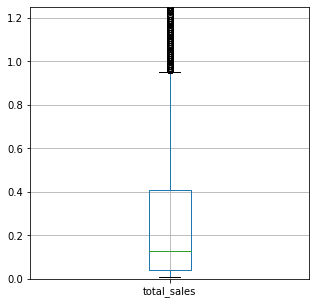

In [39]:
#"Ящик с усами" по глобальным продажам за актуальный период по всем платформам
df_actual_years.boxplot('total_sales', figsize=(5,5))
plt.ylim(0,1.25)

In [40]:
df_actual_years['total_sales'].describe()

count    4022.000000
mean        0.485855
std         1.219503
min         0.010000
25%         0.040000
50%         0.130000
75%         0.407500
max        21.050000
Name: total_sales, dtype: float64

In [41]:
df_actual_5 = df_actual_years.query('platform in @top5_platform_name')

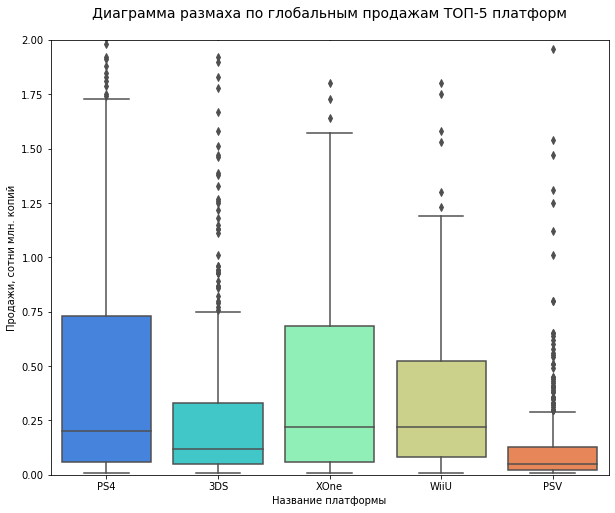

In [42]:
#"Ящик с усами" по глобальным продажам за актуальный период по каждой перспективной платформе: 
#
plt.figure(figsize=(10, 8))
plt.ylim(0, 2)
sns.boxplot(x="platform", y="total_sales", data = df_actual_5 , palette='rainbow')
plt.title('Диаграмма размаха по глобальным продажам ТОП-5 платформ\n  ', fontsize=14)
plt.ylabel('Продажи, сотни млн. копий')
plt.xlabel('Название платформы');

In [43]:
#Глобальные продажи по актуальным платформам

df_actual_years_5 = df_actual_5.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', fill_value='.')
df_actual_years_5['all_years'] = df_actual_years_5.sum(axis=1)
df_actual_years_5

year_of_release,2011,2012,2013,2014,2015,2016,all_years
platform,,,,,,,
3DS,63.2,51.36,56.57,43.76,27.78,15.14,143.25
PS4,.,.,25.99,100.00,118.90,69.25,314.14
PSV,4.63,16.19,10.59,11.90,6.25,4.25,32.99
WiiU,.,17.56,21.65,22.03,16.35,4.60,64.63
XOne,.,.,18.96,54.07,60.14,26.15,159.32


За последние 6 лет наибольший объем продажа у платформ: PS4, XOne и 3DS. Но продажи платформа 3DS за счёт более ранних продаж, тогда как сейчас наблюдается стабильное падение. 
Высокие медиальные значения у PS4, XOne и WiiU, хотя WiiU сильно меньше в объемах продаж.  
Так как продажи указаны в млн. копий, а не в денежном выражении, то есть вероятность, что платформа WiiU тоже может быть перспективной.

### Оценка влияния отзывов пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.  
Сформулирем выводы.

Самая продаваемая платформа у нас PS4, посмотрим взаимосвязи на ней.

In [44]:
#Отфильтруем данные по платформе PS4 и подготовим таблицу
filtered_PS4 = df_actual_years.query('platform == "PS4"')
filtered_PS4 = filtered_PS4[['critic_score', 'user_score', 'total_sales']]
filtered_PS4.head()

,critic_score,user_score,total_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66


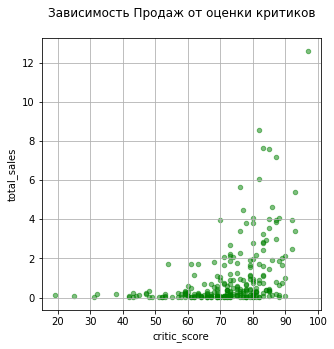

In [45]:
#Диаграмма рассеяния 
filtered_PS4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(5,5), color='g', alpha=0.5, grid=True)
plt.title('Зависимость Продаж от оценки критиков\n  ');

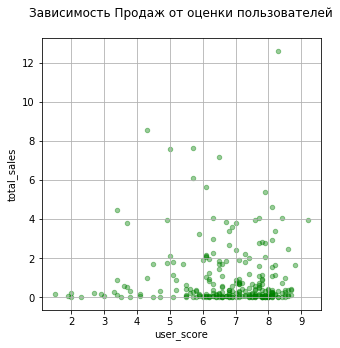

In [46]:
#Диаграмма рассеяния 
filtered_PS4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(5,5), color='g', alpha=0.4, grid=True)
plt.title('Зависимость Продаж от оценки пользователей\n  ');

Глядя на графики, можно сказать, что оценки критиков и пользователей не оказывают слишком сильного влияние на продажи игр.  
Посмотрим кореляцию

In [47]:
#Рассчитаем корреляцию
filtered_PS4.corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.56,0.41
user_score,0.56,1.00,-0.03
total_sales,0.41,-0.03,1.00


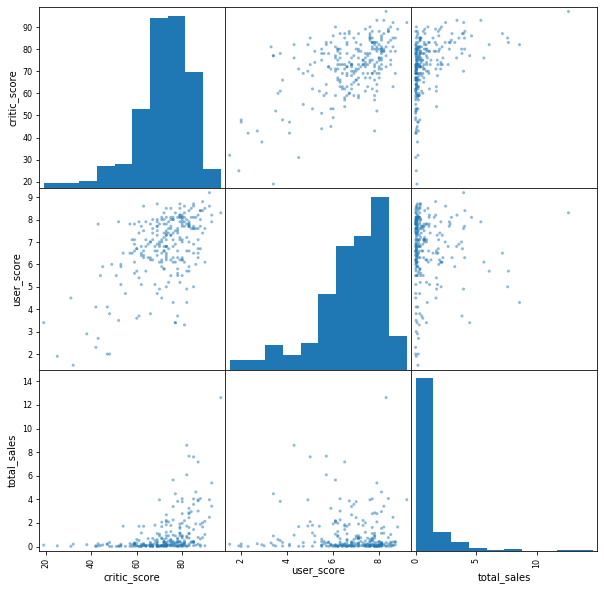

In [48]:
pd.plotting.scatter_matrix(filtered_PS4, figsize=(10,10), alpha=0.5)
plt.ticklabel_format(useOffset=False)

Есть положительная средняя корреляция между оценкой критиков и пользователей.  
Критики могут учитывать мнение пользоватлей в своих оценках и наоборот.

### Соотнесите выводы с продажами игр на других платформах.

Рассчитаем корреляцию для других платформ

In [49]:
df_actual_years.query('platform == "3DS"')[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.75,0.35
user_score,0.75,1.00,0.22
total_sales,0.35,0.22,1.00


In [50]:
df_actual_years.query('platform == "XOne"')[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.47,0.42
user_score,0.47,1.00,-0.07
total_sales,0.42,-0.07,1.00


In [51]:
df_actual_years.query('platform == "WiiU"')[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.77,0.35
user_score,0.77,1.00,0.40
total_sales,0.35,0.40,1.00


In [52]:
df_actual_years.query('platform == "PSV"')[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.73,0.13
user_score,0.73,1.00,0.01
total_sales,0.13,0.01,1.00


,critic_score,user_score,total_sales
critic_score,1.00,0.58,0.35
user_score,0.58,1.00,0.05
total_sales,0.35,0.05,1.00


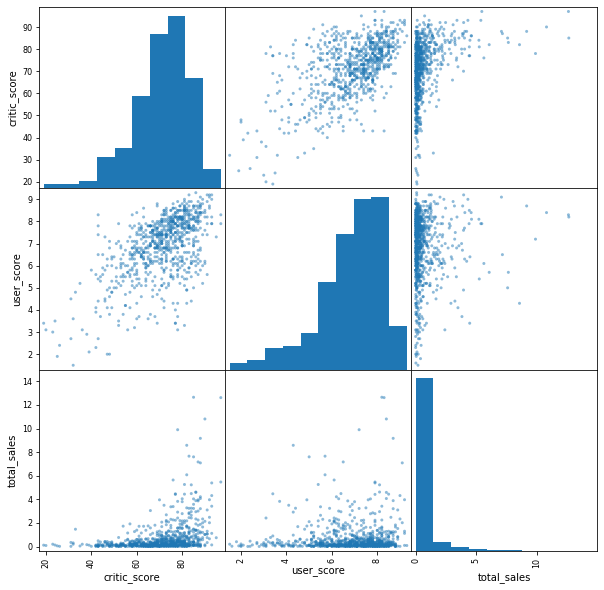

In [53]:
pd.plotting.scatter_matrix(df_actual_5[['critic_score', 'user_score', 'total_sales']], figsize=(10,10), alpha=0.5);
df_actual_5[['critic_score', 'user_score', 'total_sales']].corr().round(2)

Для остальных платформ мы видим более выраженную корреляцию между оценками (> 0.7), а значит существует положительная связь - чем выше оценки критиков, тем выше оценки пользователей и наоборот.
Связь между оценками и количеством проданных копий положительная, но очень слабая (не более 0.42), мы не можем брать её в расчёт.

При оценки общей корреляции, можно говорить о невысокой положительной связи (0.53) оценки критиков и оценки пользователей. 


### Анализ распределение игр по жанрам. 

Посмотрим на общее распределение игр по жанрам.  
Выясним, что можно сказать о самых прибыльных жанрах.  
Посмотрим, выделяются ли жанры с высокими и низкими продажами.

In [54]:
#Общее распределение игр по жанрам
df_actual_5['genre'].value_counts()

Action          629
Role-Playing    244
Adventure       175
Sports          140
Misc            139
Shooter         100
Platform         71
Racing           63
Fighting         60
Simulation       44
Strategy         34
Puzzle           28
Name: genre, dtype: int64

In [55]:
df_actual_5

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [56]:
#Самые прибыльные жанры
df_genre = df_actual_5.groupby(['genre'])\
                        .agg({'total_sales':'sum', 'name':'count'})\
                        .rename(columns={'name':'name_count'})\

df_genre.sort_values(by = 'total_sales', ascending=False)

,total_sales,name_count
genre,,
Action,227.34,629
Shooter,160.00,100
Role-Playing,138.78,244
Sports,95.85,140
Platform,65.24,71
Racing,47.18,63
Misc,43.50,139
Fighting,30.55,60
Simulation,29.16,44


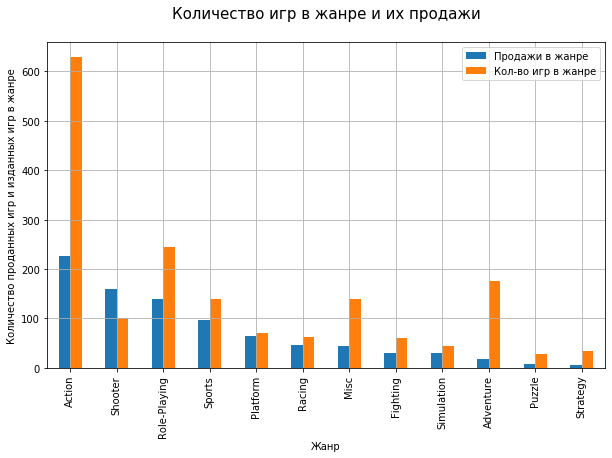

In [57]:
ax=df_genre[['total_sales', 'name_count']].sort_values(by = 'total_sales', ascending=False).plot(kind='bar', figsize=(10, 6))

plt.title('Количество игр в жанре и их продажи\n  ', fontsize=15)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр и изданных игр в жанре')
plt.legend(['Продажи в жанре', 'Кол-во игр в жанре'])
plt.grid(True)
plt.show()

Мы можем сказать, что самыми продаваемыми жанрами являются:
- Action
- Shooter
- Role-Playing	
- Sports
- Platform

Но мы не можем сказть, какой из жанров прибыльнее, так как не знаем затраты на создание игры. 
В жанре Action самое большое кол-во игр, возможно их создание обходится недорого, а объемы продаж позволяют производителям получать хорошую прибыль. Также большое кличество игр наблюдается в жанре Role-Playing и сопровождается высоким уровнем продаж.  
А вот в жанре Shooter игр не так много, хотя жанр на 2 месте по объемам продаж, возможно создание игр обходится существенно дороже и прибыль становится не такой ощутимой.

Самые низкие продажи и минимальное количество игр у жанров Puzzle и Strategy.

### Вывод

Нам удалось выяснить, что:
- актуальный период, данные которого помогут построить прогноз на 2017 - это 2011 - 2016 годы
- самые перспективные платформы: PS4, XOne и WiiU
- оценки критиков и пользователей не имеют выраженного влияния на объемы продаж, но оценки влияют друг на друга
- самые продаваемые жанры: Action, Role-Playing, именно в этих жанрах подавляющее большинство игр. Игры в жанре Shooter на 2м месте по продажам, но его представляет куда меньшее количество игр. В зависимости от цены создания игры в этом жанре, он может быть перспективной прибыльной и свободной нишей или же оказаться неприбыльным и оттого в нём мало конкурентов.

## Составление портрета пользователя каждого региона

In [58]:
df_actual_5.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


In [59]:
df_actual_5[['na_sales', 'eu_sales', 'jp_sales']].describe()

,na_sales,eu_sales,jp_sales
count,1727.000000,1727.000000,1727.000000
mean,0.194024,0.169166,0.087881
std,0.506066,0.492371,0.306206
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.030000,0.020000,0.020000
75%,0.160000,0.120000,0.060000
max,6.030000,6.310000,4.390000


###  Самые популярные платформы (топ-5)

In [60]:
#Самые популярные платформы (топ-5). 
df_platform = df_actual_5.groupby(['platform'])\
                        .agg({'na_sales':'sum'})\
                      

df_platform.sort_values(by = 'na_sales', ascending=False)

,na_sales
platform,
PS4,108.74
XOne,93.12
3DS,82.65
WiiU,38.10
PSV,12.47


In [61]:
df_na_platform = df_actual_5.groupby(['platform']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print(  )
print('-- Топ5 платформ Северной Америки --')
display(df_na_platform)

df_eu_platform = df_actual_5.groupby(['platform']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print(  )
print('-- Топ5 платформ Европы --')
display(df_eu_platform)
 
df_jp_platform = df_actual_5.groupby(['platform']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print(  )
print('-- Топ5 платформ Японии --')
display(df_jp_platform)


-- Топ5 платформ Северной Америки --


,platform,na_sales
1,PS4,108.74
4,XOne,93.12
0,3DS,82.65
3,WiiU,38.10
2,PSV,12.47



-- Топ5 платформ Европы --


,platform,eu_sales
1,PS4,141.09
0,3DS,61.27
4,XOne,51.59
3,WiiU,25.13
2,PSV,13.07



-- Топ5 платформ Японии --


,platform,jp_sales
0,3DS,100.62
2,PSV,21.84
1,PS4,15.96
3,WiiU,13.01
4,XOne,0.34


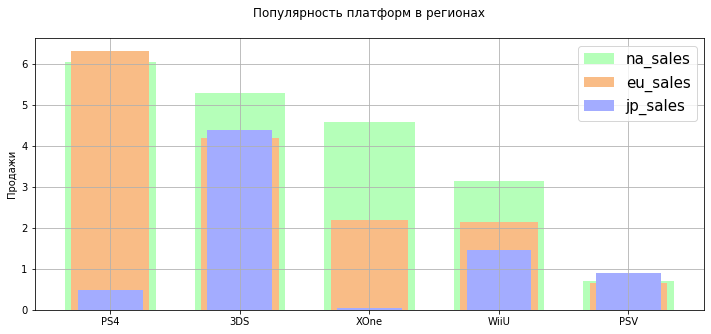

In [62]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

#Задаём переменные 
x = list(df_actual_5['platform'])
y1 = df_actual_5['na_sales']
y2 = df_actual_5['eu_sales']
y3 = df_actual_5['jp_sales']

#Строим графики
ax.bar(x, y1, 0.7, label='na_sales', color = '#b5ffb9')
ax.bar(x, y2, 0.6, label='eu_sales', color = '#f9bc86')
ax.bar(x, y3, 0.5, label='jp_sales', color = '#a3acff')

#Оформляем  
ax.set_title('Популярность платформ в регионах\n  ')
ax.set_ylabel('Продажи')
ax.grid()
ax.legend(fontsize=15)

plt.show();

График получился не очень репрезентативным, попробуем сделать диаграмму пирог

In [63]:
top_5platform_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_5platform_dict[region] = df_actual_5.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
top_5platform_dict

{'na_sales': platform
 PS4     108.74
 XOne     93.12
 3DS      82.65
 WiiU     38.10
 PSV      12.47
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS4     141.09
 3DS      61.27
 XOne     51.59
 WiiU     25.13
 PSV      13.07
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 3DS     100.62
 PSV      21.84
 PS4      15.96
 WiiU     13.01
 XOne      0.34
 Name: jp_sales, dtype: float64}

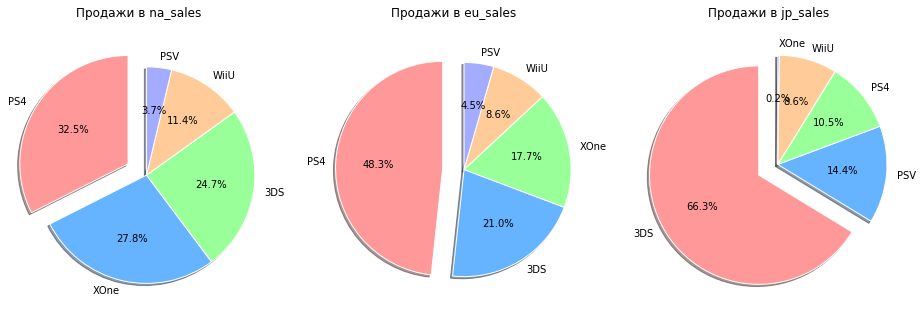

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

#Задаём переменные 
i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.2, 0, 0, 0, 0)

#Задаём набор цветов
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#a3acff']

#Цикл для вывода диаграмм распределения жанров 
for i in [0,1,2]:
    labels = top_5platform_dict[region[i]].index
    sizes = top_5platform_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors) 
    ax.axis('equal')  
plt.show()


**Выводы:**
- Топ5 платформ в США и Европе очень схож. 1 мето у платформы PS4, причем если в США доля от всех продаж 32,5%, то в Европе практически половина продаж приходится на эту платформу (48.3%). Платформы XOne и 3DS в зависимости от региона занимают 2 и 3 место. 4 и 5 места у платформ WiiU и PSV соответственно с примерно одинаковыми долями для каждого рынка.
- Топ5 платформ в Японии заметно отличается. Тут 1 место 2/3 (66,3%) продаж принадлежит платформе 3DS. Платформы PSV, PS4 и WiiU составляют 14.4%, 10.5% и 8.6% соответственно. При выходе на Японский рынок стоит учитывать его особенности.Портативная игровая система 3DS производства Nintendo невероятно популярна за счет своей доступности в регионе создания.

###  Самые популярные жанры (топ-5)

In [65]:
#Самые популярные жанры (топ-5). 
df_na_genre = df_actual_5.groupby(['genre']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print(  )
print('-- Топ5 жанров Северной Америки --')
display(df_na_genre)

df_eu_genre = df_actual_5.groupby(['genre']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print(  )
print('-- Топ5 жанров Европы --')
display(df_eu_genre)
 
df_jp_genre = df_actual_5.groupby(['genre']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print(  )
print('-- Топ5 жанров Японии --')
display(df_jp_genre)


-- Топ5 жанров Северной Америки --


,genre,na_sales
0,Action,87.24
8,Shooter,73.96
7,Role-Playing,42.44
10,Sports,39.68
4,Platform,26.94



-- Топ5 жанров Европы --


,genre,eu_sales
0,Action,79.05
8,Shooter,60.53
10,Sports,39.23
7,Role-Playing,32.35
4,Platform,22.06



-- Топ5 жанров Японии --


,genre,jp_sales
7,Role-Playing,54.19
0,Action,36.54
4,Platform,10.71
3,Misc,10.70
9,Simulation,10.64


In [66]:
top5genre_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5genre_dict[region] = df_actual_5.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
top5genre_dict

{'na_sales': genre
 Action          87.24
 Shooter         73.96
 Role-Playing    42.44
 Sports          39.68
 Platform        26.94
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action          79.05
 Shooter         60.53
 Sports          39.23
 Role-Playing    32.35
 Platform        22.06
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    54.19
 Action          36.54
 Platform        10.71
 Misc            10.70
 Simulation      10.64
 Name: jp_sales, dtype: float64}

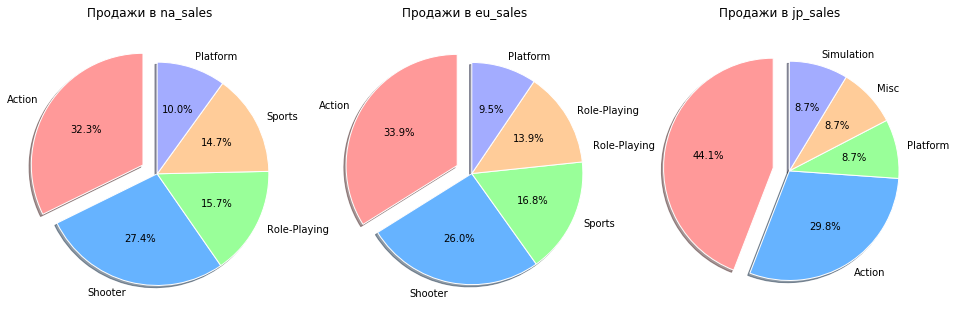

In [67]:
#Самые популярные жанры (топ-5)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

#Задаём переменные 
i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

#Задаём набор цветов
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#a3acff']

#Цикл для вывода диаграмм распределения жанров 
for i in [0,1,2]:
    labels = top5genre_dict[region[i]].index
    sizes = top5genre_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors) 
    ax.axis('equal')  

plt.show()

**Выводы:**
- Топ5 жанров в США и Европе словпадает 1 мето (32-34% всех продаж) и 2 место (26-27%  всех продаж) у жанров Action и Shooter соответственно. Role-Playing и Sports с примерно равным соотношением долей продаж (14-17%), в зависимости от региона жанры занимают 3 или 4 место. На 5 месте жанр Platform, около 10% от продаж.
- Топ5 жанров в Японии заметно отличается. Тут 1 место и 44% продаж принадлежат жанру Role-Playing. Жанр Action занимает 2 место и 30% продаж. Жанры Platform, Misc и Simulation по 8.7% от всех продаж. При выходе на Японский рынок стоит учитывать его особенности. 

###  Влияние рейтинга ESRB на продажи 

In [68]:
df_rating = (df_actual_years
          .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],aggfunc='sum')
          )
df_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,141.73,36.68,170.17
E10+,78.00,11.23,117.72
EC,0.00,0.00,0.42
M,250.26,26.14,308.45
RP,0.03,0.00,0.00
T,83.16,33.39,109.31


В условиях задания не было полной расшифровки аббревиатур. 
В интернете удалось найти расшифровку значений рейтинга ESRB:
- AO (Adults only 18+) — только для взрослых
- E - everyone - для всех
- M (Mature 17+) — от 17 лет
- T (Teen) — для подростков 13-19 лет
- K-A (Kids to Adults)— для детей и взрослых
- E10+ (Everyone 10+) — для всех старше 10 лет
- EC (Early Childhood) — для детей младшего возраста
- RP (Rating pending) — рейтинг ожидается

In [69]:
df_actual_years.groupby(['rating']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)

,rating,na_sales
3,M,308.45
0,E,170.17
1,E10+,117.72
5,T,109.31
2,EC,0.42


In [70]:
df_actual_years.groupby(['rating']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)

,rating,eu_sales
3,M,250.26
0,E,141.73
5,T,83.16
1,E10+,78.00
4,RP,0.03


In [71]:
df_actual_years.groupby(['rating']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)

,rating,jp_sales
0,E,36.68
5,T,33.39
3,M,26.14
1,E10+,11.23
2,EC,0.00


Можно сказать, что чем шире возрастные рамки, тем больше продаж. В США и Европе больше покупок совершается в играх 17+, тогда как в Японии кроме общего "Для всех" лидирует более младшая группа 13-19 лет. Игры 10+ тоже довольно популярны, в США они даже на 3м месте.

###  Выводы

В Северной Америке и Европе очень схожий портрет пользователя:
- Топ5 платформы PS4, XOne, 3DS, WiiU и PSV с небольшой разницей в распределении продаж.
- самые популярные жанры - Action, Shooter, Sports, Role-Playing и Platform
- большая доля продаж приходится на рейтинг M (Mature 17+) — от 17 лет, далее по популярности рейтинг E - everyone - для всех. Затем идут в примерно равных долях E10+ (Everyone 10+) — для всех старше 10 лет и T (Teen) — для подростков 13-19 лет

Портрет пользователя в Японии заметно отличается:
- лидирует местная платформа: 66,3% продаж принадлежит платформе 3DS. Платформы PSV, PS4 и WiiU составляют 14.4%, 10.5% и 8.6% соответственно
- 1 место и 44% продаж принадлежат жанру Role-Playing. Жанр Action занимает 2 место и 30% продаж. Жанры Platform, Misc и Simulation по 8.7% от всех продаж. 
- в примерно равной популярности рейтинги  E - everyone - для всех и T (Teen) — для подростков 13-19 лет. На 3 месте M (Mature 17+) — от 17 лет. При выходе на Японский рынок стоит учитывать его особенности. 

## Проверка гипотез

###	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [72]:
#Сформируем данные для проверки гипотезы
xone = df_actual_years.query(' platform == "XOne" ')['user_score'].dropna().to_list()
pc = df_actual_years.query(' platform == "PC" ')['user_score'].dropna().to_list()

#Рассчитаем средние значения
xone_mean = df_actual_years.query(' platform == "XOne" ')['user_score'].mean()
pc_mean = df_actual_years.query(' platform == "PC" ')['user_score'].mean()

print('Средний пользовательский рейтинг Xbox One: {:.3}\n'
     'Средний пользовательский рейтинг PC: {:.2}'.format(xone_mean, pc_mean))

Средний пользовательский рейтинг Xbox One: 6.52
Средний пользовательский рейтинг PC: 6.5


In [73]:
#Рассчитаем дисперсии
print('Дисперсия XOne =', np.var(xone))    
print('Дисперсия PC =',  np.var(pc))

Дисперсия XOne = 1.8965188383045526
Дисперсия PC = 2.5878388099608483


**Сформулируем гипотезы:**

H0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые  
H1: средние пользовательские рейтинги платформ Xbox One и PC различаются  


Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются примерно на 27%.
Критический уровень значимости 0.01. Пусть вероятность правильности вывода будет 99% и больше

In [74]:
alpha = .01

results = st.ttest_ind(
    xone, 
    pc,
    nan_policy='omit', 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


**Вывод:**  
Не удалось отвергнуть гипотезу о равенстве средних пользовательских рейтингов у платформ Xbox One и PC , а значит средние пользовательские рейтинги с большой вероятность равны.  
Как мы выяснили ранее, средний пользовательский рейтинг для PC 6.5, а для Xbox One 6.52, что подтверждает нашу проверку.

### Средние пользовательские рейтинги жанров Action и Sports разные

In [75]:
#Сформируем данные для проверки гипотезы
action = df_actual_years.query('genre == "Action"')['user_score'].dropna().to_list()
sports = df_actual_years.query('genre == "Sports"')['user_score'].dropna().to_list()

#Рассчитаем средние значения
action_mean = df_actual_years.query('genre == "Action"')['user_score'].mean()
sports_mean = df_actual_years.query('genre == "Sports"')['user_score'].mean()

print('Средний пользовательский рейтинг Action: {:.3}\n'
     'Средний пользовательский рейтинг Sports: {:.2}'.format(action_mean, sports_mean))

Средний пользовательский рейтинг Action: 6.78
Средний пользовательский рейтинг Sports: 5.7


In [76]:
#Рассчитаем дисперсии
print('Дисперсия XOne =', np.var(action))    
print('Дисперсия PC =',  np.var(sports))

Дисперсия XOne = 1.8091482798664535
Дисперсия PC = 2.87079202194461


**Сформулируем гипотезы:**

H0: cредние пользовательские рейтинги жанров Action и Sports одинаковые   
H1: средние пользовательские рейтинги жанров Action и Sports разные

Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются примерно на 34%.
Критический уровень значимости 0.01. Пусть вероятность правильности вывода будет 99% и больше

In [77]:
alpha = .01

results = st.ttest_ind(
    action, 
    sports, 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.285648549432565e-19
Отвергаем нулевую гипотезу


**Вывод:**  
Отвергаем гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports, а значит средние пользовательские рейтинги с большой вероятность отличаются.  
Так как гипотеза двухсторонняя, то сама проверка не даёт нам понять в какую именно сторону оно отличается.  
Но как мы уже выяснили ранее: средний пользовательский рейтинг жанра Action 6.78, а для Sports 5.7.

## Результаты исследования

### Выводы

В ходе исследования рынка компьютерных игр мы обработали массивов данных: 
- заменили названия столбцов
- преобразовали типы данных в нужные
- обработали пропуски
- посчитали суммарные продажи во всех регионах в новый столбец
 
На этапе исследования данных нам удалось выяснить, что:
- актуальный период, данные которого помогут построить прогноз на 2017 - это 2011 - 2016 годы
- самые перспективные платформы: PS4, XOne и WiiU
- оценки критиков и пользователей не имеют выраженного влияния на объемы продаж, но оценки влияют друг на друга
- самые продаваемые жанры: Action, Role-Playing, именно в этих жанрах подавляющее большинство игр. Игры в жанре Shooter на 2м месте по продажам, но его представляет куда меньшее количество игр. В зависимости от цены создания игры в этом жанре, он может быть перспективной прибыльной и свободной нишей или же оказаться неприбыльным и оттого в нём мало конкурентов.

Портрет пользователей в Америке и Европе схож, но заметно отличается от Японии:
- В Америке и Европе самые популярные платформы - PS4, XOne, 3DS. И игры с жанрами - Action, Shooter.  
- Большая доля продаж приходится на рейтингM (Mature 17+) — от 17 лет, далее по популярности рейтинг E - everyone - для всех.  
- В Японии свои особые предпочтения в плане видеоигр, максимально популярны ролевые видеоигры, а платформа - 3DS. 

В результате проверок гипотез, мы выяснили, ччто:
- Cредние пользовательские рейтинги платформ Xbox One и PC не различаются  
- Cредние пользовательские рейтинги жанров Action и Sports различаются  


### Рекомендации

Целью исследования было веявление определяющих успешность игры закономерностей, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на предстоящий год.

Можно дать следующие рекомендации для планирования рекламных кампаний:
- ставку лучше делать на игры для приставок/консолей.
- важно учитывать региональные предпочтения к платформам и жанрам, при выходе на новый рынок.
- помнить, что чем шире возрастной рейтинг, тем больше продаж.